<a href="https://colab.research.google.com/github/geral98atehortua/Mujeres_Digitales/blob/main/Taller_semana_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Un fanático de pokemones le pide analizar los datos de pokemones, para esto se le proporciona un conjunto de datos en archivo csv. Este fanático le pide a usted como analista investigar cuales son los pokemones con mayor ataque.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as num

In [4]:
df = pd.read_csv('pokemon_data.csv')
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


## Ejercicio 1:

Calcule el promedio y la mediana del ataque de: 
1. Todos los pokemones
2. Los pokemones agrupados por Legendary (es decir el promedio y mediana de pokemones legendarios y no legendarios)
3. Los pokemones agrupados por Type 1

**1.1 promedio y la mediana del ataque de todos los pokemones**


In [5]:
df['Attack'].describe()

count    800.000000
mean      79.001250
std       32.457366
min        5.000000
25%       55.000000
50%       75.000000
75%      100.000000
max      190.000000
Name: Attack, dtype: float64

In [8]:
dfpok=df['Attack'].mean()
round(dfpok)

79.00125

In [9]:
dfpok=df['Attack'].median()
dfpok

75.0

**1.2. promedio y la mediana del ataque de los pokemones agrupados por legendary**





In [12]:
df['clasificacion of legendary']=num.where(df['Legendary']==True,'Legendario','No Legendario')
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,clasificacion of legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,No Legendario
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,No Legendario
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,No Legendario
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,No Legendario
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,No Legendario
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,Legendario
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,Legendario
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,Legendario
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,Legendario


In [20]:
dflg=df[['clasificacion of legendary','Attack']].groupby('clasificacion of legendary').mean()
round(dflg,4)

,Attack
clasificacion of legendary,
Legendario,116.6769
No Legendario,75.6694


In [21]:
dflg=df[['clasificacion of legendary','Attack']].groupby('clasificacion of legendary').median()
round(dflg,4)

,Attack
clasificacion of legendary,
Legendario,110
No Legendario,72


**1.3. Promedio y Ataque de los pokemones agrupados por tipo**

In [22]:
dfty=df[['Type 1','Attack']].groupby('Type 1').mean()
round(dfty,4)

,Attack
Type 1,
Bug,70.9710
Dark,88.3871
Dragon,112.1250
Electric,69.0909
Fairy,61.5294
Fighting,96.7778
Fire,84.7692
Flying,78.7500
Ghost,73.7812


In [23]:
dfty=df[['Type 1','Attack']].groupby('Type 1').median()
round(dfty,4)

,Attack
Type 1,
Bug,65.0
Dark,88.0
Dragon,113.5
Electric,65.0
Fairy,52.0
Fighting,100.0
Fire,84.5
Flying,85.0
Ghost,66.0


## Ejercicio 2:

Grafique el ataque de los pokemones con un grafico boxplot para los siguientes casos:
1. Todos los pokemones
2. Los pokemones agrupados por Legendary (es decir el promedio y mediana de pokemones legendarios y no legendarios)
3. Los pokemones agrupados por Type 1

**2.1. Grafico Todos los pokemones**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


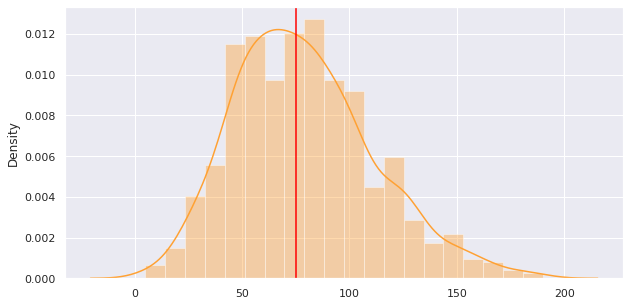

In [26]:
sns.set(rc={'figure.figsize':(10,5)})
vdata = df['Attack'].values
sns.distplot(vdata, color='#FFA133')
plt.axvline(dfpok ,0,1, color='red')

## Ejercicio 3:

Realice las siguientes pruebas de hipótesis:
1. El promedio del ataque de los pokemones es mayor a 77
2. El promedio del ataque de los pokemones legendarios es diferente a los no legendarios


Y determine con un nivel de significancia del 5% (es decir $\alpha$ = 0.05), si podemos rechazar o no las 3 hipótesis anteriores. 